In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing dataset

In [174]:
df = pd.read_csv("churn_prediction_data.csv")

In [175]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Female,82,0,234628.86,1,1,0,182668.03,1
1,1002,Male,38,6,110710.15,1,0,1,63794.06,0
2,1003,Female,37,3,118320.04,3,1,1,140566.99,1
3,1004,Male,35,1,162201.05,1,1,0,170302.01,0
4,1005,Female,27,2,145675.66,3,0,0,31760.78,1


In [176]:
df.tail()


,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,10999,Male,86,0,172424.16,1,1,1,56740.90,0
9999,11000,Male,19,6,239091.45,2,0,1,127214.92,0
10000,11001,Male,37,10,223190.97,1,0,0,195452.90,1
10001,11002,Male,80,2,86758.50,1,1,1,127509.14,0
10002,11003,Male,26,9,100033.09,2,1,0,102576.95,0


checking for nan values in dataset

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10003 non-null  int64  
 1   Gender           10003 non-null  object 
 2   Age              10003 non-null  int64  
 3   Tenure           10003 non-null  int64  
 4   Balance          10003 non-null  float64
 5   NumOfProducts    10003 non-null  int64  
 6   HasCrCard        10003 non-null  int64  
 7   IsActiveMember   10003 non-null  int64  
 8   EstimatedSalary  10003 non-null  float64
 9   Exited           10003 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.6+ KB


In [178]:
df.isna().sum().sum()

0

therefore there are no nan values. 

checking for duplicates

In [179]:
df.duplicated().sum()

0

therefor no duplicate values

In [180]:
df.describe()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000
mean,6002.000000,55.279516,4.979206,126179.822146,1.524243,0.703489,0.512746,100204.943104,0.199140
std,2887.761705,21.364053,3.149061,72510.885806,0.579327,0.456742,0.499862,57735.603578,0.399374
min,1001.000000,18.000000,0.000000,17.270000,1.000000,0.000000,0.000000,13.860000,0.000000
25%,3501.500000,37.000000,2.000000,63220.155000,1.000000,0.000000,0.000000,50556.520000,0.000000
50%,6002.000000,55.000000,5.000000,127373.080000,1.000000,1.000000,1.000000,100025.890000,0.000000
75%,8502.500000,74.000000,8.000000,188898.180000,2.000000,1.000000,1.000000,150603.340000,0.000000
max,11003.000000,92.000000,10.000000,250859.050000,4.000000,1.000000,1.000000,199971.860000,1.000000


obtaining corerelation

In [181]:
numeric_colums_data=df.select_dtypes(include=["number"])
numeric_colums_data.corr()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerID,1.000000,0.013117,-0.006034,-0.006908,-0.006623,0.000774,-0.002614,-0.012853,0.006325
Age,0.013117,1.000000,-0.012452,-0.009230,0.014655,0.008986,-0.013010,0.000797,-0.003372
Tenure,-0.006034,-0.012452,1.000000,-0.009116,0.006579,0.000857,-0.002690,-0.009372,0.005678
Balance,-0.006908,-0.009230,-0.009116,1.000000,0.006297,0.010304,0.008598,0.008078,-0.005127
NumOfProducts,-0.006623,0.014655,0.006579,0.006297,1.000000,-0.021574,-0.018589,0.005696,0.005924
HasCrCard,0.000774,0.008986,0.000857,0.010304,-0.021574,1.000000,-0.011471,0.007993,0.000356
IsActiveMember,-0.002614,-0.013010,-0.002690,0.008598,-0.018589,-0.011471,1.000000,-0.008928,-0.000196
EstimatedSalary,-0.012853,0.000797,-0.009372,0.008078,0.005696,0.007993,-0.008928,1.000000,0.019806
Exited,0.006325,-0.003372,0.005678,-0.005127,0.005924,0.000356,-0.000196,0.019806,1.000000


In [182]:
df

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Female,82,0,234628.86,1,1,0,182668.03,1
1,1002,Male,38,6,110710.15,1,0,1,63794.06,0
2,1003,Female,37,3,118320.04,3,1,1,140566.99,1
3,1004,Male,35,1,162201.05,1,1,0,170302.01,0
4,1005,Female,27,2,145675.66,3,0,0,31760.78,1
...,...,...,...,...,...,...,...,...,...,...
9998,10999,Male,86,0,172424.16,1,1,1,56740.90,0
9999,11000,Male,19,6,239091.45,2,0,1,127214.92,0
10000,11001,Male,37,10,223190.97,1,0,0,195452.90,1
10001,11002,Male,80,2,86758.50,1,1,1,127509.14,0


In [183]:
df["Exited"].value_counts()

Exited
0    8011
1    1992
Name: count, dtype: int64

upscaling

In [184]:
from sklearn.utils import resample
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,    
                                 n_samples=len(df_majority),    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled.Exited.value_counts())

Exited
0    8011
1    8011
Name: count, dtype: int64


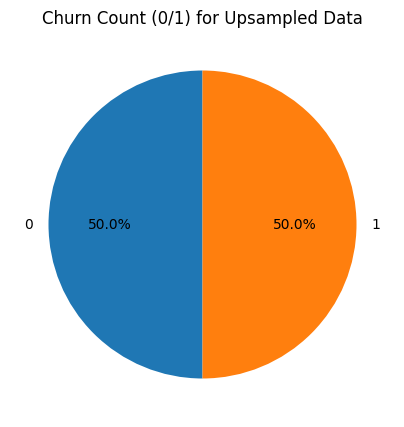

In [185]:
churn_counts_upsampled = df_upsampled['Exited'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(churn_counts_upsampled, labels=churn_counts_upsampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Count (0/1) for Upsampled Data')
plt.show()

In [186]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Female,82,0,234628.86,1,1,0,182668.03,1
1,1002,Male,38,6,110710.15,1,0,1,63794.06,0
2,1003,Female,37,3,118320.04,3,1,1,140566.99,1
3,1004,Male,35,1,162201.05,1,1,0,170302.01,0
4,1005,Female,27,2,145675.66,3,0,0,31760.78,1


In [187]:
df_upsampled.groupby('Exited')['Balance'].mean()

Exited
0    126365.211178
1    124517.554268
Name: Balance, dtype: float64

In [188]:
df_upsampled.groupby(['Exited','Gender'])['Balance'].mean()

Exited  Gender
0       Female    125370.416634
        Male      127198.237528
1       Female    126021.843367
        Male      123308.296875
Name: Balance, dtype: float64

In [189]:
df_upsampled.groupby('Exited')['Tenure'].mean()

Exited
0    4.970291
1    4.960929
Name: Tenure, dtype: float64

In [190]:
df_upsampled.groupby('Exited')['Age'].mean()

Exited
0    55.315441
1    54.749719
Name: Age, dtype: float64

In [191]:
print(df_upsampled.groupby('Exited')['EstimatedSalary'].mean())

Exited
0     99634.739392
1    102929.532564
Name: EstimatedSalary, dtype: float64


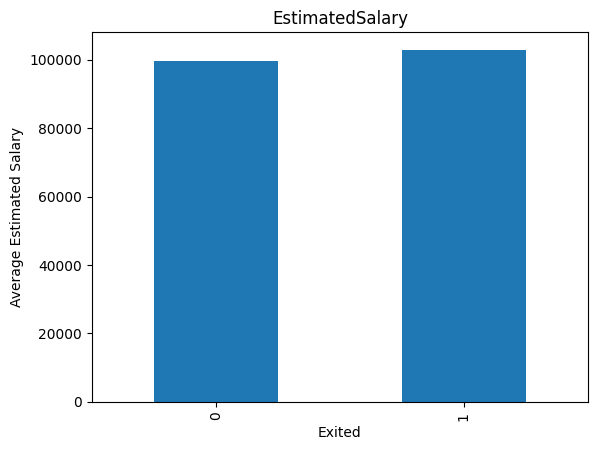

In [192]:
df_upsampled.groupby("Exited")["EstimatedSalary"].mean().plot(kind="bar")
plt.title("EstimatedSalary")
plt.xlabel("Exited")
plt.ylabel("Average Estimated Salary")
plt.show()

feature engineering

In [193]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [194]:
# Fix 1: Use the upsampled dataset for feature engineering
y_upsampled = df_upsampled[["Exited"]]
x_upsampled = df_upsampled[["CustomerID","Age","Gender","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].copy()

In [195]:
x_upsampled

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,1002,38,Male,6,110710.15,1,0,1,63794.06
3,1004,35,Male,1,162201.05,1,1,0,170302.01
6,1007,55,Male,9,182544.43,2,0,0,6280.89
7,1008,77,Male,10,175770.88,2,1,0,30439.43
9,1010,87,Female,4,229827.56,1,1,0,27797.69
...,...,...,...,...,...,...,...,...,...
3546,4547,49,Male,2,40422.39,1,1,1,47416.60
6609,7610,51,Male,8,43542.02,1,0,1,136727.50
15,1016,63,Female,6,208685.60,2,1,0,176224.36
634,1635,67,Male,1,164886.81,2,1,0,137451.63


In [196]:
y_upsampled

,Exited
1,0
3,0
6,0
7,0
9,0
...,...
3546,1
6609,1
15,1
634,1


In [197]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Female,82,0,234628.86,1,1,0,182668.03,1
1,1002,Male,38,6,110710.15,1,0,1,63794.06,0
2,1003,Female,37,3,118320.04,3,1,1,140566.99,1
3,1004,Male,35,1,162201.05,1,1,0,170302.01,0
4,1005,Female,27,2,145675.66,3,0,0,31760.78,1


In [198]:
# Fix 2: Apply gender encoding to upsampled data
x_upsampled["Gender"] = x_upsampled["Gender"].map({"Female": 1, "Male": 0})

In [199]:
y_upsampled

,Exited
1,0
3,0
6,0
7,0
9,0
...,...
3546,1
6609,1
15,1
634,1


In [200]:
x_upsampled["Gender"].unique()

array([0, 1], dtype=int64)

In [201]:
x_upsampled.head()

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,1002,38,0,6,110710.15,1,0,1,63794.06
3,1004,35,0,1,162201.05,1,1,0,170302.01
6,1007,55,0,9,182544.43,2,0,0,6280.89
7,1008,77,0,10,175770.88,2,1,0,30439.43
9,1010,87,1,4,229827.56,1,1,0,27797.69


In [202]:
type(x_upsampled["Gender"].iloc[0])


numpy.int64

In [203]:
type(y_upsampled["Exited"].iloc[0])

numpy.int64

train test split

In [204]:
# Fix 3: Use upsampled data for train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_upsampled, y_upsampled, test_size=0.2, random_state=42, stratify=y_upsampled)

In [205]:
# Continue with scaling as before
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Save scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [206]:
x_train

array([[ 1.38520025, -0.28681393,  1.1075739 , ..., -1.52387259,
        -1.0074397 , -1.56093158],
       [-1.31463157, -0.9920012 ,  1.1075739 , ..., -1.52387259,
        -1.0074397 ,  1.48262448],
       [ 0.87717478, -1.74420095,  1.1075739 , ...,  0.65622284,
        -1.0074397 ,  0.49155253],
       ...,
       [-0.34470219,  0.74746072,  1.1075739 , ..., -1.52387259,
         0.99261524,  0.75694167],
       [-0.92948218, -0.89797623,  1.1075739 , ..., -1.52387259,
         0.99261524,  1.70761681],
       [-1.27849155,  0.70044824,  1.1075739 , ...,  0.65622284,
        -1.0074397 , -0.36342206]])

In [207]:
x_test

array([[ 0.29962279,  1.17057308,  1.1075739 , ...,  0.65622284,
        -1.0074397 ,  0.12435789],
       [ 1.05202366, -1.22706362, -0.90287429, ..., -1.52387259,
        -1.0074397 ,  0.96470646],
       [ 0.84826276,  1.02953563, -0.90287429, ..., -1.52387259,
        -1.0074397 , -1.29332082],
       ...,
       [-0.97594793,  0.08928594, -0.90287429, ...,  0.65622284,
         0.99261524,  0.56036163],
       [ 0.6066409 , -0.42785139, -0.90287429, ...,  0.65622284,
         0.99261524, -1.61017401],
       [ 1.70564179, -0.05175151,  1.1075739 , ...,  0.65622284,
         0.99261524, -0.66833158]])

In [208]:
from sklearn.metrics import accuracy_score
def modelperformance(model_name, predictions):
  print("Accuracy score on {} is {}".format(model_name, accuracy_score(y_test,predictions)))

Importing grid search for hyper tunning

In [209]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_imputed, y_train.values.ravel())

# Best estimator
best_lr_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_lr_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model (NO comma!)
rfc_model = RandomForestClassifier()

# Define parameter grid (NO comma!)
param_grid = {
    "n_estimators": [64, 128],
    "max_features": [3, 4],
    "bootstrap": [True]
}

# Perform grid search
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train.values.ravel())

# Get best estimator
best_rfc_model = grid_rfc.best_estimator_

# Save model
joblib.dump(best_rfc_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [212]:
import xgboost as xgb

# Define XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Grid Search
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train.values.ravel())

# Best estimator
best_xgb_model = grid_xgb.best_estimator_

# Save model
joblib.dump(best_xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']

model selection

In [213]:
from sklearn.metrics import accuracy_score


# Dictionary of models
models = {
    "Logistic Regression": best_lr_model,
    "Random Forest Classifier": best_rfc_model,
    "XGBoost Classifier": best_xgb_model
}

# Evaluate and select best model
best_model_name = None
best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    if acc > best_accuracy:
        best_model_name = name
        best_model = model
        best_accuracy = acc

# Save the best model
joblib.dump(best_model, "model.pkl")


Logistic Regression: Accuracy = 0.5076
Random Forest Classifier: Accuracy = 0.9679
XGBoost Classifier: Accuracy = 0.5903


['model.pkl']

model evaluation and output

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1603
           1       0.98      0.96      0.97      1602

    accuracy                           0.97      3205
   macro avg       0.97      0.97      0.97      3205
weighted avg       0.97      0.97      0.97      3205



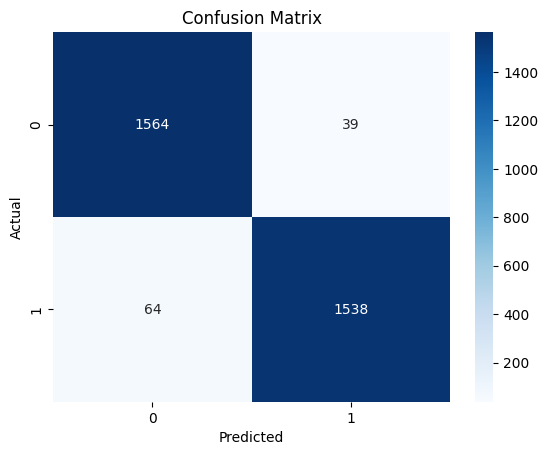

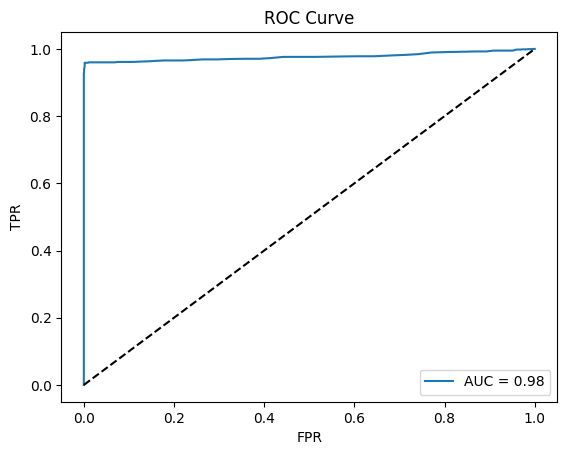

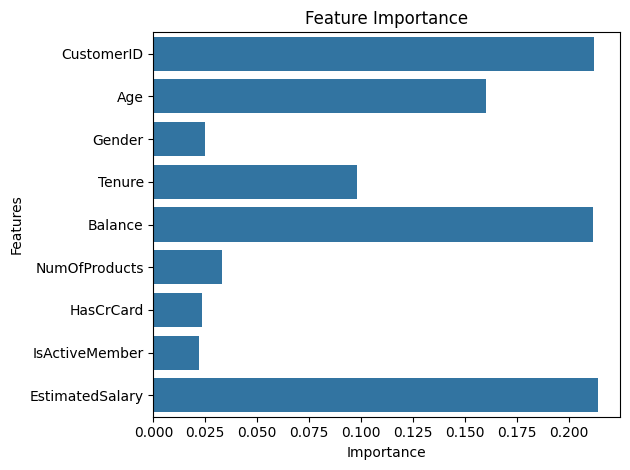

✅ Output saved to final_churn_predictions.csv


In [214]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are 1D
y_pred = best_model.predict(x_test).ravel()
y_proba = best_model.predict_proba(x_test)[:, 1].ravel()

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC and AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance (tree models only)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = x_upsampled.columns
    sns.barplot(x=importance, y=features)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# Ensure x_test is a DataFrame
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test, columns=x_upsampled.columns)

# Add predictions to output DataFrame
output_df = x_test.copy()
output_df["Churn_Prediction"] = y_pred
output_df["Churn_Probability"] = y_proba

# Save to CSV
output_df.to_csv("final_churn_predictions.csv", index=False)
print("✅ Output saved to final_churn_predictions.csv")
